In [14]:
import json
import torch
from PIL import Image
import numpy as np
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random
import plotly.graph_objects as go

In [15]:
save_dir = "../data/tensor/"
images_load = np.load(save_dir+"images.npy")
image_np = np.asarray(images_load)
image_tensors_load = torch.from_numpy(image_np)
image_tensors_load = torch.squeeze(image_tensors_load)
image_tensors_load = image_tensors_load.type(torch.float16)
print(type(image_tensors_load))
print(image_tensors_load.shape)

# file_name {"dev.json","test.json","train.json"}
file_name = "dev.json"
doc_lst = json.load(open("../data/"+file_name))
dim = len(doc_lst)

<class 'torch.Tensor'>
torch.Size([1040919, 512])


00064768_11448_01.jpg
Search Query: A dog was rescued last month from a farm in Wonju, South Korea. Humane Society International offers to pay farmers to release dogs so they can be sent abroad to be adopted.


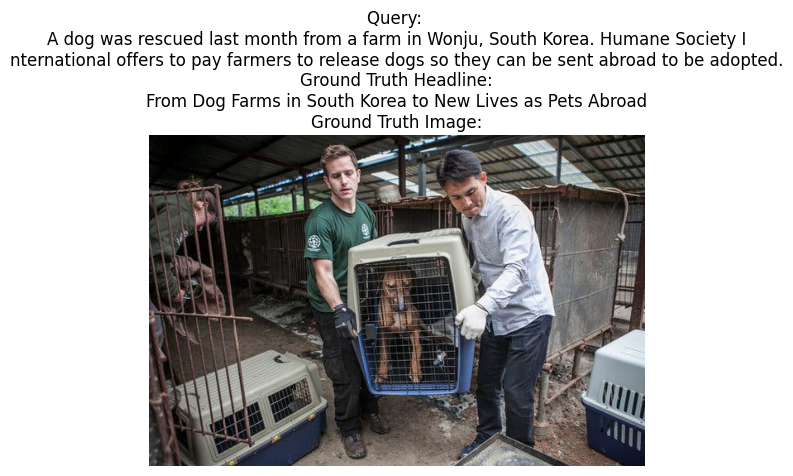

In [40]:
import textwrap

INDEX = 200

data = doc_lst[INDEX]
query = data["query"]
candidate = data["candidates"][0]
id = candidate["candidate_id"]
image_path = candidate["image"]
print(image_path)
headline = candidate["headline"]
print("Search Query:",query)
img = Image.open("../data/image/"+image_path)
# display(img)

plt.imshow(img)
plt.title("Query: \n"+query[:80]+"\n"+query[80:]+"\nGround Truth Headline:\n"+headline+"\nGround Truth Image:")
plt.axis('off')
plt.show()

In [47]:
# Assuming 'data' is your 512-dimensional dataset, a numpy array with shape (number_of_samples, 512)
# Replace this with your actual data

# Generating random data for demonstration purposes
# data = np.random.rand(100, 512)  # Replace this with your data
# print(data.shape)
SIZE = 500
random.seed(42)
image_npy = image_tensors_load.numpy()
indices = random.sample(range(image_npy.shape[0]), SIZE)
image_subset = image_npy[:SIZE]
print(image_subset.shape)

(500, 512)


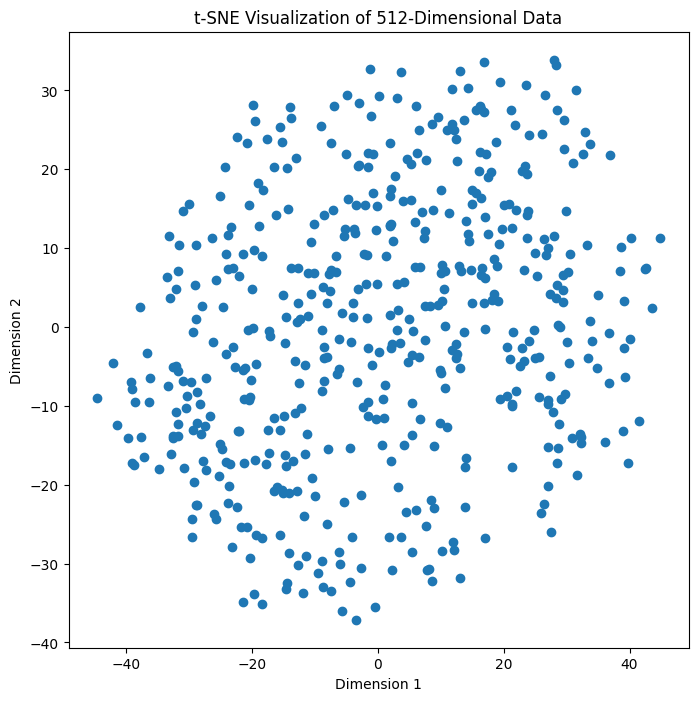

In [18]:
# Initialize t-SNE
tsne = TSNE(n_components=3, random_state=42)

# Reduce the dimensionality to 2 dimensions
embedded_data = tsne.fit_transform(image_subset)

# Plot the t-SNE visualization
plt.figure(figsize=(8, 8))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1])
plt.title('t-SNE Visualization of 512-Dimensional Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

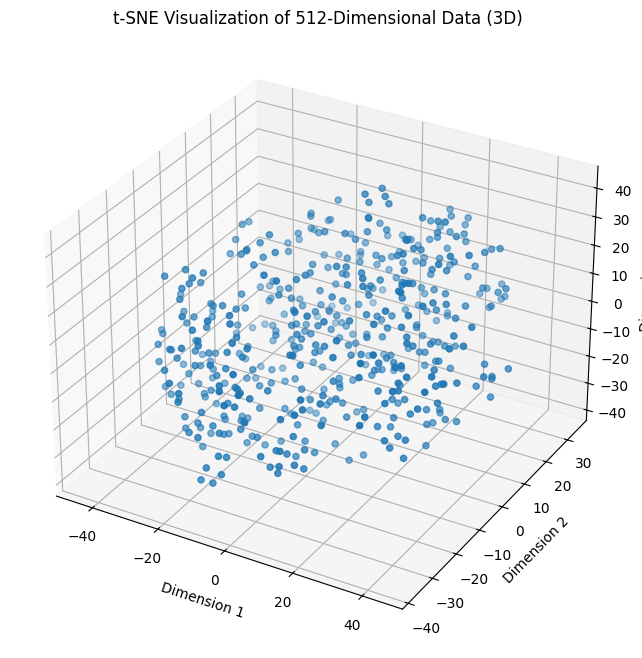

In [19]:
tsne = TSNE(n_components=3, random_state=42)
embedded_data = tsne.fit_transform(image_subset)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedded_data[:, 0], embedded_data[:, 1], embedded_data[:, 2])
ax.set_title('t-SNE Visualization of 512-Dimensional Data (3D)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()

In [20]:
# Create an interactive 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=embedded_data[:, 0],
    y=embedded_data[:, 1],
    z=embedded_data[:, 2],
    mode='markers',
    marker=dict(size=5)
)])

fig.update_layout(title='t-SNE Visualization of 512-Dimensional Data (3D)',
                  scene=dict(
                      xaxis_title='Dimension 1',
                      yaxis_title='Dimension 2',
                      zaxis_title='Dimension 3'
                  )
)

fig.show()

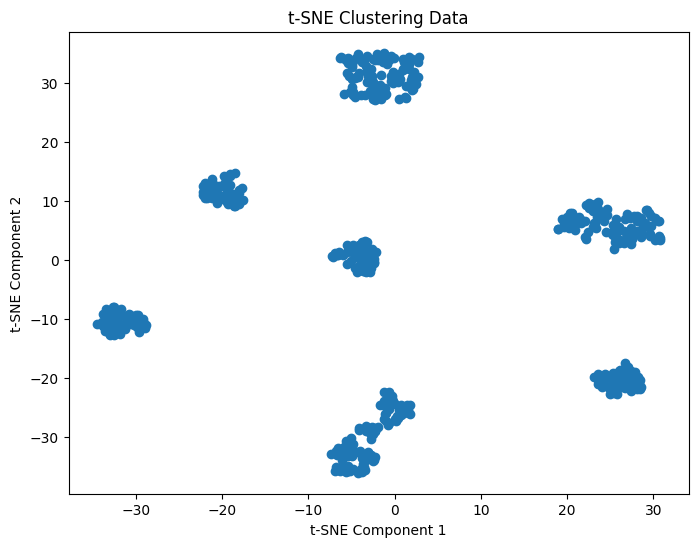

In [53]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# import pandas as pd

# Assuming you have your data in a pandas DataFrame or numpy array
# For this example, let's create some random data
from sklearn.datasets import make_blobs

# Generate random data
data, _ = make_blobs(n_samples=500, centers=10, random_state=42)

# Apply t-SNE to the data
tsne = TSNE(n_components=2, random_state=42)
# tsne_results = tsne.fit_transform(image_subset)
tsne_results = tsne.fit_transform(data)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title('t-SNE Clustering Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

/Users/nullptr/Documents/Drive/05_2023FA/cs6670/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



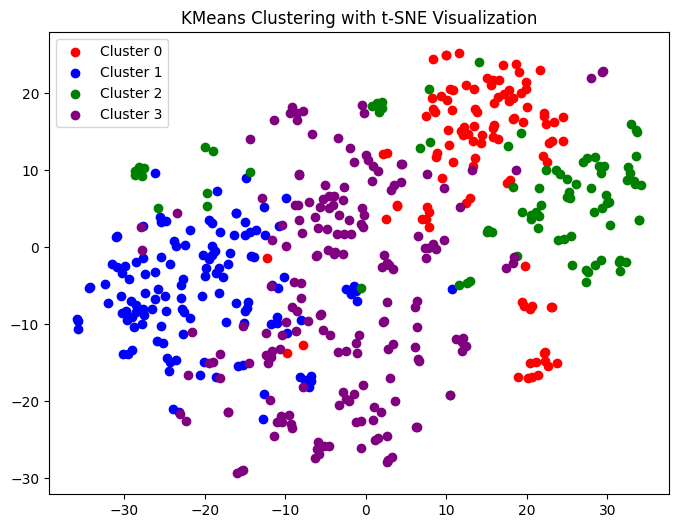

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Generating random data
# data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

image_subset = image_npy[:SIZE]

# Clustering the data with KMeans (assuming there are 4 clusters)
kmeans = KMeans(n_clusters=4)
kmeans.fit(image_subset)
predicted_labels = kmeans.predict(image_subset)

# Applying t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(image_subset)

# Plotting the clustered data
plt.figure(figsize=(8, 6))

# Assigning different colors to different clusters
colors = ['red', 'blue', 'green', 'purple']
for label, color in zip(range(4), colors):
    plt.scatter(tsne_data[predicted_labels == label, 0], tsne_data[predicted_labels == label, 1], c=color, label=f'Cluster {label}')

plt.title('KMeans Clustering with t-SNE Visualization')
plt.legend()
plt.show()


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D visualization tools
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Generating random data
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Clustering the data with KMeans (assuming there are 4 clusters)
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
predicted_labels = kmeans.predict(data)

# Applying t-SNE for visualization
tsne = TSNE(n_components=3, random_state=42)  # Using 3 components for 3D visualization
tsne_data = tsne.fit_transform(data)

# Plotting the clustered data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assigning different colors to different clusters
colors = ['red', 'blue', 'green', 'purple']
for label, color in zip(range(4), colors):
    ax.scatter(tsne_data[predicted_labels == label, 0], tsne_data[predicted_labels == label, 1], tsne_data[predicted_labels == label, 2], c=color, label=f'Cluster {label}')

ax.set_title('KMeans Clustering with 3D t-SNE Visualization')
ax.legend()
plt.show()

/Users/nullptr/Documents/Drive/05_2023FA/cs6670/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



ValueError: n_components=3 must be between 1 and min(n_samples, n_features)=2 with svd_solver='randomized'